<a href="https://colab.research.google.com/github/elainefreire-hash/Trabalho-redes-neurais/blob/main/Trabalho2_RN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho 2 - Fundamentos de Inteligência Artificial

Membros: Anna Luisa Antony Afonso, Beatriz Quaresma Athaide, Elaine de Castro Freire, Manuela Figueira Batista, Raissa Clara Teixeira Brasil e Ruthelene Rodrigues Farias.

O código apresentado realiza uma série de etapas preparatórias essenciais para um projeto de *machine learning* ou análise de dados, focando na classificação de doenças cardíacas usando redes neurais.


# 1 - Inicialização e Carregamento de Dados

Os blocos a seguir de código importam e exibem as versões das principais bibliotecas utilizadas. Esta é uma prática recomendada para garantir a reprodutibilidade do ambiente de execução e evitar problemas de compatibilidade entre as diferentes versões.

As bibliotecas verificadas incluem:

*   sys: Para informações sobre o ambiente Python.
*   pandas: Para manipulação e análise de dados.
*   numpy: Para operações numéricas e array de alto desempenho.
*   sklearn: Para ferramentas de aprendizado de máquina.
*   matplotlib: Para visualização e plotagem de dados.
*   keras: Para a construção e treinamento de redes neurais.

Em seguida, o código monta o Google Drive no ambiente de execução e importa matplotlib.pyplot e seaborn para criar gráficos e visualizações estatísticas, e pandas.plotting.scatter_matrix para gráficos de dispersão.

Em resumo, o código está configurando o ambiente, verificando as dependências e carregando os dados brutos necessários para iniciar a fase de exploração e pré-processamento de dados para o projeto de machine learning.

In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2
Sklearn: 1.6.1
Matplotlib: 3.10.0
Keras: 3.10.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

# 2 - Importação do Dataset

Este bloco inicial carrega o dataset em cleveland, confirmando suas dimensões (303 amostras e 14 colunas). A inspeção imediata das linhas revela a presença de valores ausentes codificados como '?', sinalizando a necessidade urgente de limpeza de dados antes de qualquer processamento estatístico ou treinamento de modelo.

Os valores '?' são substituídos e todas as linhas que contêm valores nulos (NaN) são removidas, resultando no DataFrame data com menos amostras (ex: 297 linhas) e garantindo a integridade dos dados. Embora o dataset esteja limpo de inconsistências, o data.dtypes confirma que as colunas ainda são do tipo object, exigindo conversão para o formato numérico na próxima etapa para permitir cálculos.

O código converte todas as colunas para o tipo numérico (int64 ou float64), passo fundamental para a modelagem de Machine Learning. Após a conversão, o data.describe() gera as estatísticas descritivas, fornecendo um resumo rápido sobre a escala, a média e o desvio padrão de cada característica, sendo crucial para identificar possíveis outliers e planejar o pré-processamento de scaling.

A chamada data.hist() plota um histograma para cada variável, permitindo a análise visual da distribuição de frequência. Esta visualização é essencial para avaliar a simetria dos dados e, mais crucialmente, verificar o balanceamento da classe alvo (target), ou seja, se a proporção de pacientes com e sem doença cardíaca está equilibrada.

O pd.crosstab cruza idade com a variável target para criar um gráfico de barras que mostra a frequência de casos positivos e negativos em cada idade. A visualização permite identificar as faixas etárias com maior prevalência da doença no dataset, oferecendo um insight direto sobre a importância da idade como preditora.

O código calcula e exibe a matriz de correlação de Pearson via um Heatmap. A análise primária foca na correlação entre as características e a variável target (os valores mais próximos de ±1), identificando os preditores mais fortes. Secundariamente, o gráfico ajuda a detectar a multicolinearidade (alta correlação entre preditores).

Ao final, o código calcula e plota a média da frequência cardíaca máxima (thalach) por idade. O gráfico de pontos resultante deve exibir a tendência de queda do thalach conforme a idade avança, o que é um comportamento fisiológico esperado, validando a qualidade e a coerência da variável no contexto do problema de classificação.

In [ ]:
path = '/content/drive/MyDrive/Dataset RN/heart.csv'
cleveland = pd.read_csv(path)

In [ ]:
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1:300])

Shape of DataFrame: (1025, 14)
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
5     58    0   0       100   248    0        0      122      0      1.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
296   67    1   0       120   237    0        1       71      0      1.0   
297   58    1   0       150   270    0        0      111      1      0.8   
298   35    1   1       122   192    0        1      174      0      0.0   
299   52    1   1       120   325    0        1      172      0      0.2   
300   46    0   1       105   204    0        1      172      0      0.0   

     slope  ca  thal  target  
1        0   0     3     

In [ ]:
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
data.drop_duplicates(inplace=True)
print('Shape of DataFrame after removing duplicates: {}'.format(data.shape))

Shape of DataFrame after removing duplicates: (302, 14)


In [ ]:
print(data.shape)
print(data.dtypes)

(302, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
data = data.apply(pd.to_numeric)
data.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


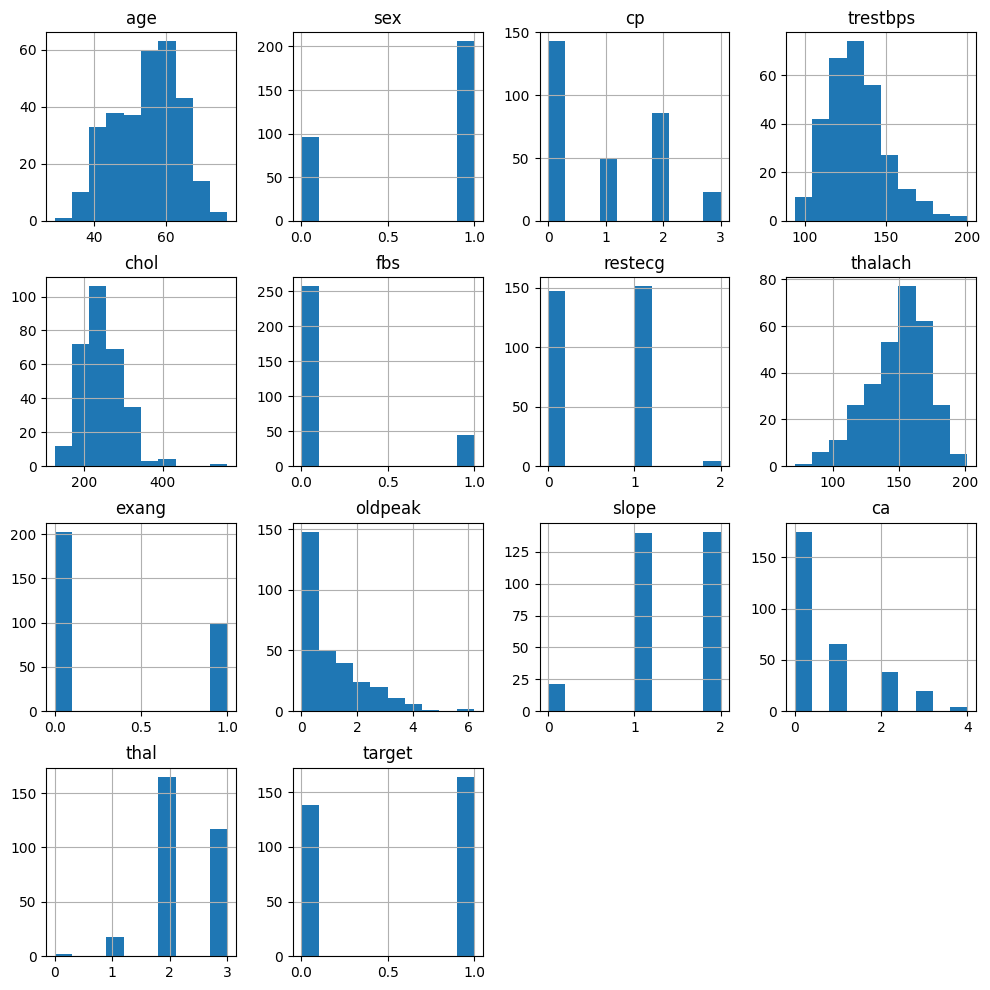

In [ ]:
data.hist(figsize = (12, 12))
plt.show()

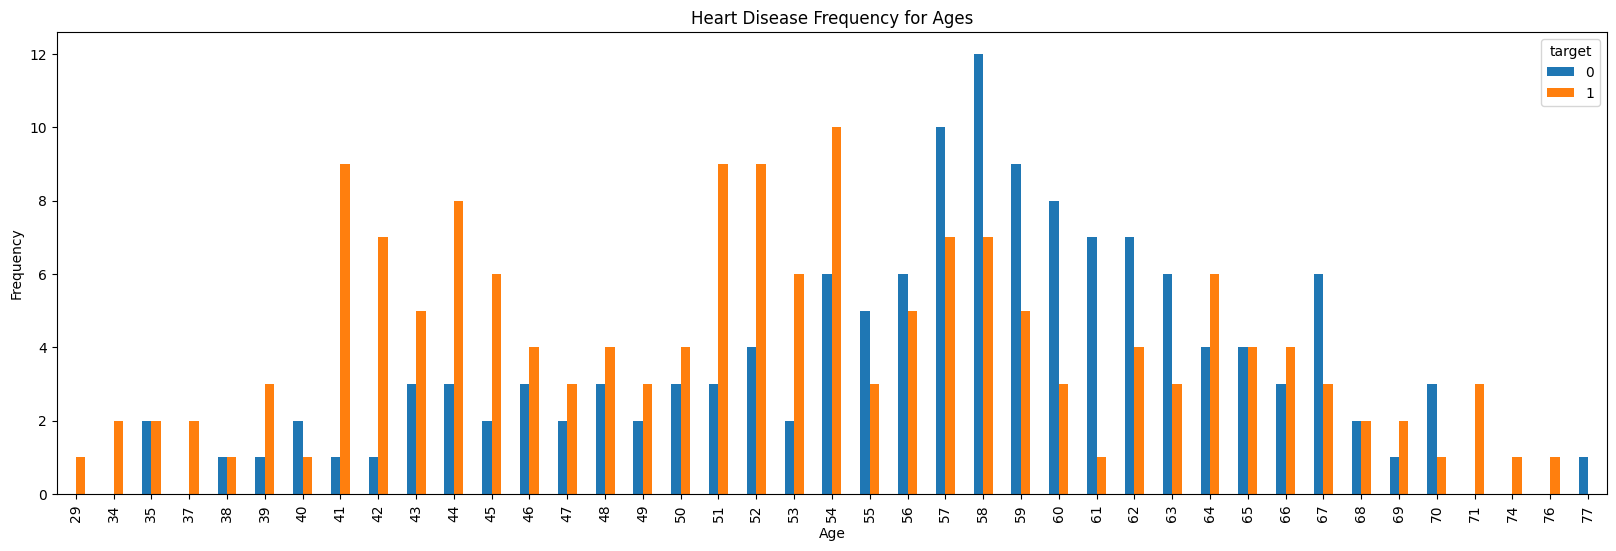

In [ ]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

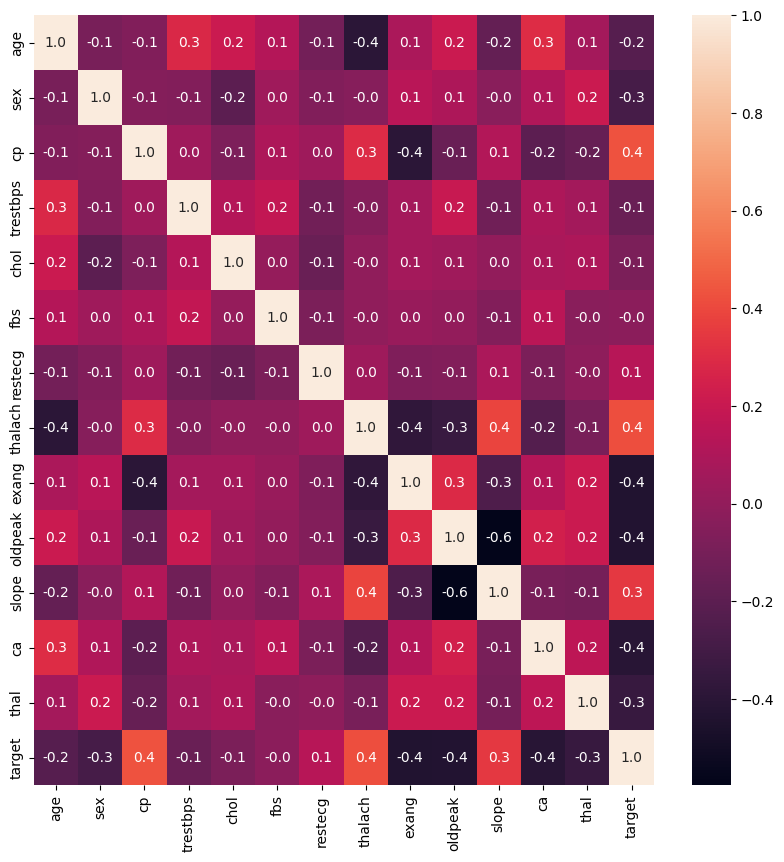

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

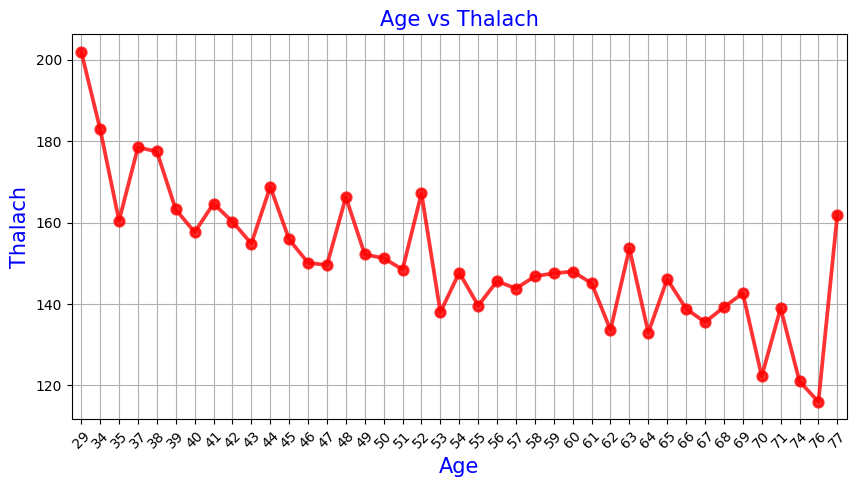

In [ ]:
age_unique=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

# 3 - Criação dos Dados de Treinamento

O primeiro bloco é o passo inicial na preparação dos dados para o aprendizado de máquina. A coluna target é separada do dataset para formar a variável alvo y, enquanto o restante das colunas (as características) compõe a matriz X (preditores). Ambas são convertidas em arrays NumPy, o formato padrão exigido pelas bibliotecas de modelagem como Scikit-learn, garantindo que os dados estejam estruturados corretamente antes do treinamento.

O bloco seguinte executa uma verificação rápida do conteúdo do array X. Ao inspecionar X[0], é possível visualizar os valores de todas as características (variáveis clínicas) para o primeiro paciente no conjunto de dados. Essa inspeção simples confirma que o processo de separação de X e y ocorreu corretamente, e que os dados numéricos estão intactos antes das transformações de splitting e scaling.

O terceiro bloco realiza duas etapas. Primeiro, o train_test_split divide o dataset em conjuntos de treino (80%) e teste (20%). O parâmetro stratify=y é essencial para garantir que a proporção da classe target seja mantida nos subconjuntos. Segundo, o StandardScaler padroniza as características, sendo ajustado (fit_transform) apenas no conjunto de treino (X_train) e depois aplicado (transform) ao conjunto de teste (X_test), evitando vazamento de dados (data leakage). Essa padronização é vital para o desempenho de muitos algoritmos de Machine Learning.

O comando final, X[0], exibe o primeiro vetor de características do array original X. Embora o contexto de Machine Learning exija a inspeção de X_train[0] ou X_test[0] para ver os valores padronizados (próximos a zero), este bloco serve para mostrar que a matriz original X não foi modificada pela padronização (o scaling afetou apenas X_train e X_test), mantendo a integridade do array principal.

In [ ]:
X = np.array(data.drop(['target'], axis=1))
y = np.array(data['target'])

In [ ]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['target']).values
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X[0]

array([ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
         2.,   3.])

# 4 - Treinamento da Rede Neural

O primeiro bloco define e compila o primeiro modelo de Rede Neural Sequencial para classificação binária. O modelo tem duas camadas ocultas (16 e 8 neurônios) usando a função de ativação ReLU, com uma camada de Dropout (0.2) para prevenir overfitting inicial. A camada de saída tem 1 neurônio com ativação sigmoid, ideal para problemas binários. O modelo é compilado usando a função de perda binary_crossentropy e o otimizador adam, com accuracy como métrica de desempenho.

O bloco seguinte executa a inspeção rápida do primeiro vetor de características no conjunto de treinamento (X_train). Como o X_train foi previamente padronizado usando o StandardScaler (Bloco 10), esta visualização confirma que os valores agora estão escalonados (média próxima a zero e desvio padrão unitário), prontos para serem inseridos na Rede Neural.

O código define uma nova arquitetura de Rede Neural Sequencial, ligeiramente modificada em relação ao Bloco 12, adicionando uma terceira camada oculta de 4 neurônios. A estrutura agora é [16] -> [8] -> [4] antes da saída sigmoide. O modelo é compilado com as mesmas configurações (binary_crossentropy, adam, accuracy). A inclusão de uma nova camada é uma tentativa de encontrar uma representação mais complexa dos dados para melhorar a capacidade de aprendizado.

O quarto bloco dessa seção redefine o alvo binário (garantindo que todos os valores $>0$ sejam 1) e, em seguida, treina a Rede Neural definida anteriormente. O modelo é ajustado (model.fit) usando X_train e Y_train_binary por 50 épocas com um batch_size de 10. O validation_data (o conjunto de teste) é usado para monitorar o desempenho e detectar overfitting durante o processo de aprendizado, e os resultados são armazenados no objeto history.

O código plota a curva de acurácia ao longo das 50 épocas. A linha 'train' (accuracy) mostra o desempenho no conjunto de treinamento, enquanto a linha 'test' (val_accuracy) mostra o desempenho no conjunto de validação. A análise desta curva é fundamental para entender a performance e estabilidade do modelo; se a acurácia de treino continuar a subir enquanto a de teste estabiliza ou cai, isso é um indicativo claro de overfitting.

Semelhante à acurácia, o código plota a curva da função de perda (loss). A perda deve idealmente diminuir para ambos os conjuntos (treinamento e validação) ao longo das épocas. Se a perda de treinamento continuar a diminuir significativamente, mas a perda de validação começar a aumentar, isso também é uma forte evidência de overfitting, indicando que o modelo está memorizando o ruído nos dados de treinamento.

Tem-se o reforço a criação e confirmação do formato de rótulos binários. Embora os dados originais pudessem ter mais de dois valores (0, 1, 2, 3, 4 em alguns datasets), para a classificação binária, o código garante que todos os casos de doença sejam rotulados estritamente como 1, enquanto a ausência é 0. A impressão dos primeiros 20 elementos de Y_train_binary confirma que o array de rótulos está no formato estritamente binário (0 ou 1) necessário para a binary_crossentropy.

O código define um modelo otimizado com a introdução de técnicas de regularização L2 (regularizers.l2(0.001)) nas camadas densas e um aumento no dropout (de 0.2 para 0.25), além de ajustar o learning rate do otimizador Adam para 0.001. O objetivo da regularização é penalizar pesos grandes, forçando o modelo a ser mais simples e reduzindo o risco de overfitting em comparação com o modelo anterior. A função é encapsulada para facilitar a reexecução.

O modelo recém-criado e otimizado com regularização L2 e dropout aprimorado (binary_model) é treinado novamente com os mesmos parâmetros (50 épocas, batch size 10). O treinamento é monitorado com o conjunto de teste para que os resultados possam ser comparados com os do modelo anterior. A expectativa é que este modelo apresente uma diferença menor entre a perda de treinamento e validação, indicando melhor capacidade de generalização.

Novamente, o código plota a curva de acurácia (treino vs. teste) do modelo otimizado (com L2 e Dropout). A análise visual desta nova curva é crucial para determinar se as técnicas de regularização foram eficazes em suavizar as oscilações e reduzir a lacuna (gap) entre a acurácia de treino e a acurácia de validação, indicando um modelo que generaliza melhor para dados não vistos.

O bloco final plota a curva da função de perda (treino vs. teste) do modelo com regularização L2. O objetivo é observar se a perda de validação não aumenta drasticamente após um certo número de épocas, mantendo-se mais próxima da perda de treinamento. Se esta curva for mais estável do que a do modelo base, confirma-se que a regularização mitigou o overfitting, resultando em um modelo mais robusto.

In [ ]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

binary_model = Sequential()

binary_model.add(Dense(16, input_dim=13, activation='relu'))
binary_model.add(Dropout(0.2))

binary_model.add(Dense(8, activation='relu'))

binary_model.add(Dense(1, activation='sigmoid'))

binary_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
X_train[0]

array([ 1.42194408, -1.44559455,  0.98649276, -0.97304069,  5.88290757,
       -0.39831375, -1.00805864,  0.4082403 , -0.65271395,  0.52726339,
       -0.69712735, -0.72271635,  1.07583844])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Re-create and re-compile the model to avoid 'Creating variables on a non-first call' error
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define Y_train_binary and Y_test_binary before using them
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

history=model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary),epochs=50, batch_size=10)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5709 - loss: 0.7096 - val_accuracy: 0.5574 - val_loss: 0.6966
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6081 - loss: 0.6876 - val_accuracy: 0.5574 - val_loss: 0.6875
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6403 - loss: 0.6671 - val_accuracy: 0.5738 - val_loss: 0.6790
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7051 - loss: 0.6415 - val_accuracy: 0.6557 - val_loss: 0.6673
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6885 - loss: 0.6371 - val_accuracy: 0.7049 - val_loss: 0.6513
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7376 - loss: 0.6040 - val_accuracy: 0.7213 - val_loss: 0.6273
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7306 - loss: 0.5561 - val_accuracy: 0.7213 - val_loss: 0.6051
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7754 - loss: 0.5318 - val_accuracy: 0.7377 - val_loss

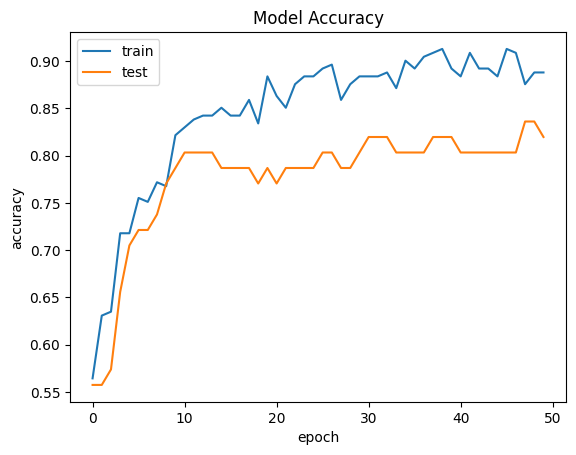

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

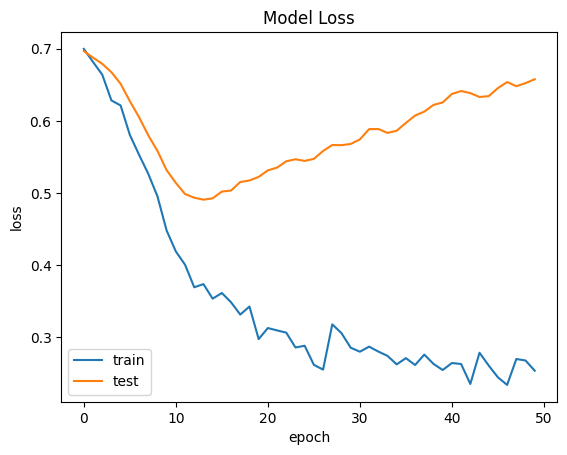

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print(Y_train_binary[:20])

[1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import Adam

def create_binary_model():
    # Create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_43 (Dense)                │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369 (1.44 KB)

 Trainable params: 369 (1.44 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history=binary_model.fit(X_train, Y_train_binary, validation_data=(X_test, Y_test_binary), epochs=50, batch_size=10)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6231 - loss: 0.6862 - val_accuracy: 0.7869 - val_loss: 0.6748
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7297 - loss: 0.6690 - val_accuracy: 0.8033 - val_loss: 0.6526
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8552 - loss: 0.6368 - val_accuracy: 0.7705 - val_loss: 0.6187
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8465 - loss: 0.6015 - val_accuracy: 0.8033 - val_loss: 0.5685
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8566 - loss: 0.5290 - val_accuracy: 0.8033 - val_loss: 0.5166
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8539 - loss: 0.4626 - val_accuracy: 0.8033 - val_loss: 0.4871
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8607 - loss: 0.4481 - val_accuracy: 0.8033 - val_loss: 0.4714
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8800 - loss: 0.3938 - val_accuracy: 0.7705 - val_l

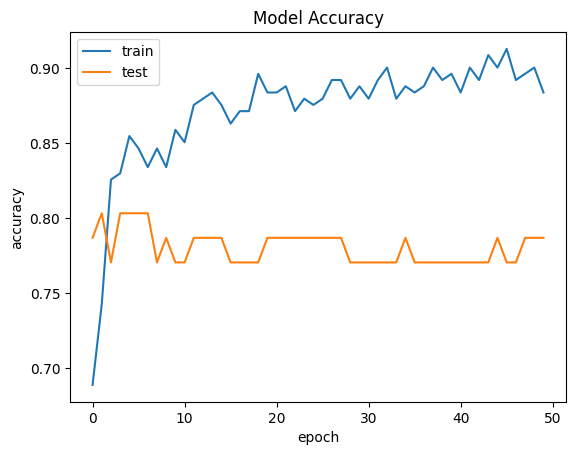

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

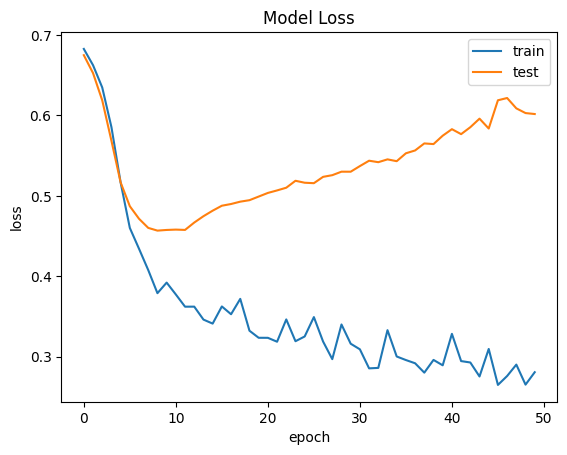

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# 5 - Avaliação Final do Modelo

Este bloco executa a avaliação final do modelo binário usando o conjunto de teste. O código gera as previsões (binary_pred) aplicando uma função round (arredondamento) na saída sigmoide para converter as probabilidades em classes binárias (0 ou 1). Em seguida, ele imprime a acurácia geral e o Relatório de Classificação, que fornece métricas detalhadas como Precisão, Recall e F1-Score para cada classe. Por fim, ele calcula a Matriz de Confusão e a visualiza como um heatmap usando Seaborn, permitindo uma análise clara de onde o modelo está acertando e errando na classificação.

A métrica Recall, também conhecida como Sensibilidade ou Taxa de Verdadeiros Positivos (True Positive Rate - TPR), é uma medida crucial na avaliação de modelos de classificação, especialmente em cenários onde a identificação correta de casos positivos é de extrema importância, como no diagnóstico médico de doenças raras ou na detecção de fraudes. O Recall mede a proporção de casos positivos reais que foram corretamente identificados pelo modelo. Em termos simples, ele responde à pergunta: "De todas as vezes em que a doença estava realmente presente, quantas vezes o modelo conseguiu detectá-la?".

Em relação ao tema do trabalho, um Recall alto é vital. Um Falso Negativo (FN) significa que o modelo previu que um paciente está 'Saudável', quando na verdade ele está 'Doente'. Um alto Recall minimiza esses Falsos Negativos, o que é fundamental, pois perder um diagnóstico positivo pode ter consequências graves para a saúde do paciente. Por outro lado, o Recall não se preocupa com os Falsos Positivos, por isso ele é frequentemente analisado em conjunto com a métrica Precisão.

A Matriz de Confusão é uma ferramenta de desempenho para algoritmos de classificação, especialmente em problemas binários. É uma tabela que descreve o desempenho de um modelo de classificação em um conjunto de dados de teste para o qual os valores verdadeiros são conhecidos. A matriz compara as previsões do modelo com a verdade real dos dados.

A matriz é composta por quatro valores essenciais:

- Verdadeiros Positivos (VP): O modelo previu 'Positivo' (Doente) corretamente.

- Verdadeiros Negativos (VN): O modelo previu 'Negativo' (Saudável) corretamente.

- Falsos Positivos (FP) - Erro Tipo I: O modelo previu 'Positivo' (Doente), mas o real era 'Negativo' (Saudável).

- Falsos Negativos (FN) - Erro Tipo II: O modelo previu 'Negativo' (Saudável), mas o real era 'Positivo' (Doente).

Esta visualização é fundamental para entender a natureza dos erros do modelo e calcular métricas mais informativas, como Precisão e Recall, que são cruciais em contextos médicos onde um Falso Negativo (deixar de diagnosticar a doença) pode ser mais crítico que um Falso Positivo.



1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Relatório de Classificação:
Acurácia: 78.69%


              precision    recall  f1-score   support

Saudável (0)       0.78      0.75      0.76        28
  Doente (1)       0.79      0.82      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



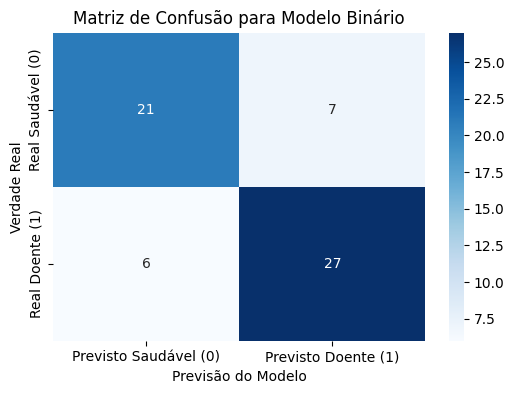

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Relatório de Classificação:')
print(f"Acurácia: {accuracy_score(Y_test_binary, binary_pred) * 100:.2f}%")
print('\n')

print(classification_report(Y_test_binary, binary_pred, target_names=['Saudável (0)', 'Doente (1)']))

# Calculate and display Confusion Matrix
cm = confusion_matrix(Y_test_binary, binary_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previsto Saudável (0)', 'Previsto Doente (1)'],
            yticklabels=['Real Saudável (0)', 'Real Doente (1)'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Verdade Real')
plt.title('Matriz de Confusão para Modelo Binário')
plt.show()

# 6 - Conclusão sobre a eficácia do modelo e a importância da normalização dos dados

A eficácia final do modelo de classificação binária é determinada pela análise das métricas de teste (Acurácia, Precisão, Recall e F1-Score) e pela Matriz de Confusão. Um bom modelo apresentará uma alta Acurácia e, mais importante em problemas médicos, um alto Recall para a classe 'Doente' (garantindo que poucos Falsos Negativos ocorram). A comparação das curvas de perda e acurácia entre os modelos base e o modelo regularizado (L2 e Dropout) é crucial: se o modelo otimizado mostrar uma menor diferença entre o desempenho de treino e teste, ele é considerado mais robusto e eficaz na generalização para novos pacientes.

A normalização (ou padronização) dos dados é de importância crítica para o sucesso das Redes Neurais. A padronização dos dados com o StandardScaler garante que todas as características contribuam igualmente para o cálculo do loss (perda), pois coloca todas as variáveis em uma escala comparável (média $\approx 0$, desvio padrão $\approx 1$). Sem a normalização, características com valores muito grandes (como a idade em anos ou o colesterol) poderiam dominar as atualizações de peso durante o treinamento via gradient descent, levando a um processo de aprendizado lento, instável e, frequentemente, a uma convergência para resultados subótimos ou a um modelo que não generaliza bem.

